## File Description
This uses Greedy Best-First Search and A* Search for a robot to find the best path from A to H.

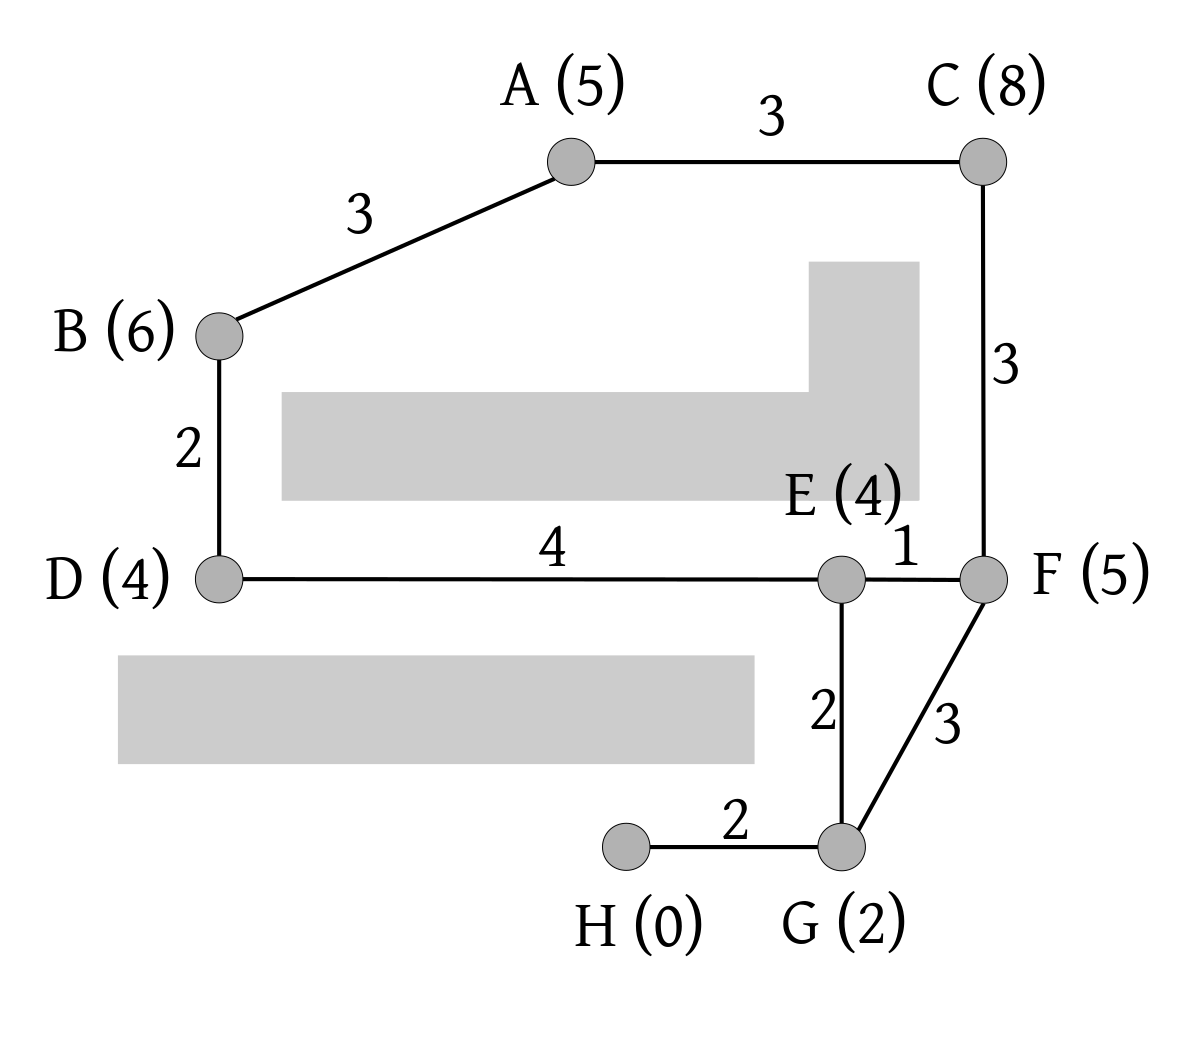

## Summary of Findings
### 1. Both algorithms can find a solution.
### 2. However, in terms of the optimal solution, A* Search is better since Greedy Best-First Search does not consider g(h).
### 3. A* Search compares several paths more than Greedy Best-First Search, indicating more memory is required.

## Input Data

In [1]:
# Graph with adjacency list
graph = {
    'A': [('B', 3), ('C', 3)],
    'B': [('A', 3), ('D', 2)],
    'C': [('A', 3), ('F', 3)],
    'D': [('B', 2), ('E', 4)],
    'E': [('D', 4), ('F', 1), ('G', 2)],
    'F': [('C', 3), ('E', 1), ('G', 3)],
    'G': [('E', 2), ('F', 3), ('H', 2)],
    'H': [('G', 2)]
}

# Heuristic values (h(n))
heuristic = {
    'A': 5,
    'B': 6,
    'C': 8,
    'D': 4,
    'E': 4,
    'F': 5,
    'G': 2,
    'H': 0
}

## Greedy Best-First Search

In [2]:
import heapq

def greedy_best_first_search(graph, heuristic, start, goal):
    frontier = [(heuristic[start], start, 0)]  # Priority queue: (h(n), node, path_cost)
    heapq.heapify(frontier)
    visited = set()
    path = []

    print("Step-by-step frontier for Greedy Best-First Search:")

    while frontier:
        print("Frontier:", [(node, h, cost) for h, node, cost in frontier])
        # Expand the node with the smallest h(n)
        _, current, current_cost = heapq.heappop(frontier)
        path.append((current, current_cost))

        if current == goal:
            print("Final Frontier:", [(node, h, cost) for h, node, cost in frontier])
            return path, current_cost  # Return the path and total cost

        # Mark the current node as visited
        visited.add(current)

        # Add unvisited neighbours to the frontier
        for neighbour, cost in graph[current]:
            if neighbour not in visited:
                heapq.heappush(frontier, (heuristic[neighbour], neighbour, current_cost + cost))

    return None, float('inf')  # Return None if no path is found

## A* Search

In [5]:
def a_star_search(graph, heuristic, start, goal):
    frontier = [(heuristic[start], start, 0)]  # Priority queue: (f(n), node, path_cost)
    heapq.heapify(frontier)
    g_score = {start: 0}  # Path cost g(n)
    visited = set()
    parent = {}  # To reconstruct the path

    print("Step-by-step frontier for A* Search (Graph Search):")

    while frontier:
        print("Frontier:", [(node, f, cost) for f, node, cost in frontier])
        # Expand the node with the smallest f(n)
        _, current, current_cost = heapq.heappop(frontier)

        if current == goal:
            print("Final Frontier:", [(node, f, cost) for f, node, cost in frontier])
            return reconstruct_path_with_cost(parent, start, goal, g_score), current_cost

        # Mark the current node as visited
        visited.add(current)

        # Expand neighbours
        for neighbour, cost in graph[current]:
            tentative_g = current_cost + cost

            # Add neighbour to frontier if unvisited or has a better path
            if neighbour not in visited or tentative_g < g_score.get(neighbour, float('inf')):
                g_score[neighbour] = tentative_g
                f_score = tentative_g + heuristic[neighbour]
                heapq.heappush(frontier, (f_score, neighbour, tentative_g))
                parent[neighbour] = current

    return None, float('inf')  # Return None if no path is found

def reconstruct_path_with_cost(parent, start, goal, g_score):
    path = []
    current = goal
    while current != start:
        path.append((current, g_score[current]))
        current = parent[current]
    path.append((start, g_score[start]))
    path.reverse()
    return path

# Test

In [6]:
# Run Greedy Best-First Search
path_gbfs, cost_gbfs = greedy_best_first_search(graph, heuristic, 'A', 'H')
print("Greedy Best-First Search Path:", path_gbfs)
print("Total Cost:", cost_gbfs)

# Run A* Search (Graph Search Version)
path_astar_graph, cost_astar_graph = a_star_search(graph, heuristic, 'A', 'H')
print("A* Search Path (Graph Search):", path_astar_graph)
print("Total Cost:", cost_astar_graph)

Step-by-step frontier for Greedy Best-First Search:
Frontier: [('A', 5, 0)]
Frontier: [('B', 6, 3), ('C', 8, 3)]
Frontier: [('D', 4, 5), ('C', 8, 3)]
Frontier: [('E', 4, 9), ('C', 8, 3)]
Frontier: [('G', 2, 11), ('C', 8, 3), ('F', 5, 10)]
Frontier: [('H', 0, 13), ('F', 5, 10), ('F', 5, 14), ('C', 8, 3)]
Final Frontier: [('F', 5, 10), ('C', 8, 3), ('F', 5, 14)]
Greedy Best-First Search Path: [('A', 0), ('B', 3), ('D', 5), ('E', 9), ('G', 11), ('H', 13)]
Total Cost: 13
Step-by-step frontier for A* Search (Graph Search):
Frontier: [('A', 5, 0)]
Frontier: [('B', 9, 3), ('C', 11, 3)]
Frontier: [('D', 9, 5), ('C', 11, 3)]
Frontier: [('C', 11, 3), ('E', 13, 9)]
Frontier: [('F', 11, 6), ('E', 13, 9)]
Frontier: [('E', 11, 7), ('E', 13, 9), ('G', 11, 9)]
Frontier: [('G', 11, 9), ('E', 13, 9), ('G', 11, 9)]
Frontier: [('G', 11, 9), ('E', 13, 9), ('H', 11, 11)]
Frontier: [('H', 11, 11), ('E', 13, 9), ('H', 11, 11)]
Final Frontier: [('H', 11, 11), ('E', 13, 9)]
A* Search Path (Graph Search): [('A',

## EOF